In [1]:
#Importing libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading Datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [8]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: >

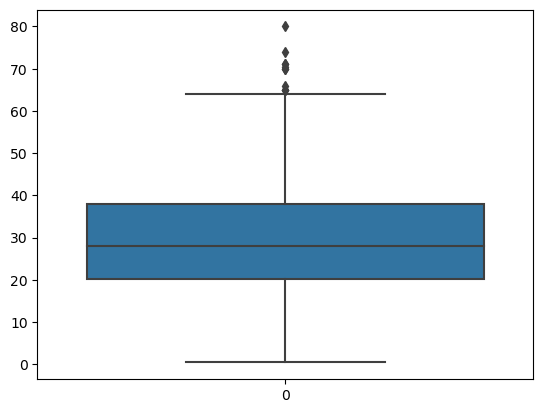

In [9]:
sns.boxplot(train_df.Age)

In [10]:
train_df[train_df['Pclass'] == 3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [11]:
train_df[train_df['Pclass'] == 2]['Survived'].value_counts()


Survived
0    97
1    87
Name: count, dtype: int64

In [12]:
train_df[train_df['Pclass'] == 1]['Survived'].value_counts()


Survived
1    136
0     80
Name: count, dtype: int64

In [13]:
#percentage of people who survived from every Pclass
for i in range(1,4):
    print(f'Pclass {i}:',round(len(train_df[(train_df['Pclass'] == i) & (train_df['Survived'] == 1)])*100 / len(train_df),2),'% Survived the Titanic incident.\n')
    print('---------------------')

Pclass 1: 15.26 % Survived the Titanic incident.

---------------------
Pclass 2: 9.76 % Survived the Titanic incident.

---------------------
Pclass 3: 13.36 % Survived the Titanic incident.

---------------------


In [14]:
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='Density'>

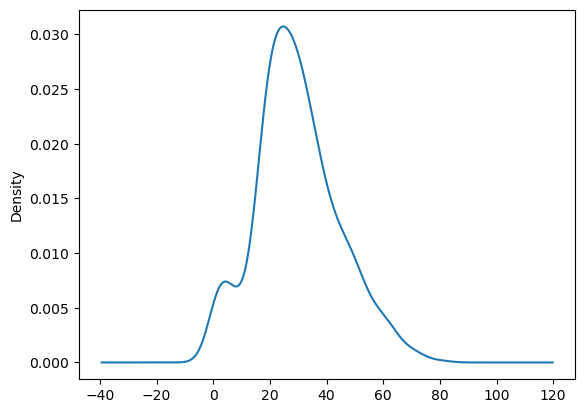

In [15]:
train_df.Age.plot(kind = 'kde')

In [16]:
train_df[train_df['SibSp'] != 0]['Survived'].value_counts()

Survived
0    151
1    132
Name: count, dtype: int64

In [18]:
train_df[train_df['SibSp'] == 0]['Survived'].value_counts()

Survived
0    398
1    210
Name: count, dtype: int64

In [19]:
train_df[train_df['Parch'] != 0]['Survived'].value_counts()

Survived
1    109
0    104
Name: count, dtype: int64

In [20]:
train_df[train_df['Parch'] == 0]['Survived'].value_counts()

Survived
0    445
1    233
Name: count, dtype: int64

In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
#Drop useless columns
train_df2 = train_df.drop(columns = ['PassengerId','Name','Ticket','Embarked'])

In [24]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
train_df.Cabin.value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [26]:
train_df['Cabin'] = train_df['Cabin'].str[0]

In [28]:
train_df['Age'].fillna(train_df.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
train_df.Age.median()

28.0

In [31]:
train_df.Age.mean()

29.69911764705882